<a href="https://colab.research.google.com/github/yrodriguezmd/Fastai_Deep_Learning/blob/main/FAI_05_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
#!pip install fastai -U
import fastai
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 49.6 MB/s 
     |████████████████████████████████| 188 kB 74.3 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 51 kB 369 kB/s 
Mounted at /content/gdrive


In [ ]:
# https://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html
# https://docs.fast.ai/data.external.html

# download and extract the data
path = untar_data(URLs.FOOD)

Path.BASE_PATH = path

# list the contents within the given path for the data
path.ls()

(#8) [Path('train.json'),Path('images'),Path('test.json'),Path('labels.txt'),Path('h5'),Path('classes.txt'),Path('train.txt'),Path('test.txt')]

In [ ]:
(path/'images').ls()

(#101) [Path('images/oysters'),Path('images/beignets'),Path('images/mussels'),Path('images/bread_pudding'),Path('images/panna_cotta'),Path('images/fried_calamari'),Path('images/breakfast_burrito'),Path('images/caprese_salad'),Path('images/pizza'),Path('images/fried_rice')...]

In [ ]:
# initial big item resize 
food = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = parent_label,
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224))

dls = food.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [ ]:
#dls.show_batch()

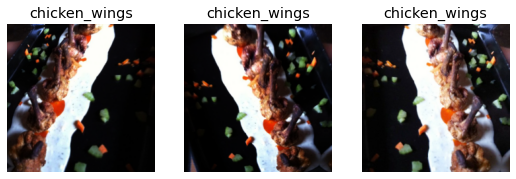

In [ ]:
dls.train.show_batch(unique=True, max_n=3)

In [ ]:
food = food.new(batch_tfms= aug_transforms( min_scale=0.5))
dls = food.dataloaders(path/'images')
dls.train.show_batch(unique=True, max_n=3)

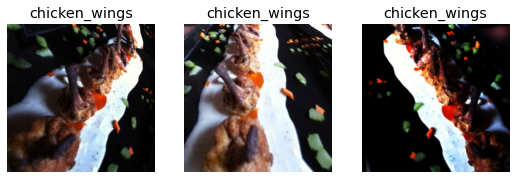

In [ ]:
food = food.new(batch_tfms= aug_transforms(mult=2))
dls = food.dataloaders(path/'images')
dls.train.show_batch(unique=True, max_n=3)

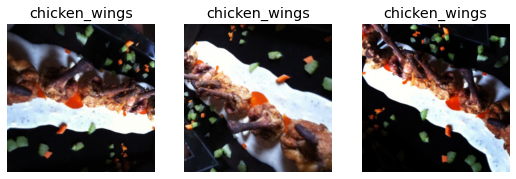

In [ ]:
food = food.new(batch_tfms= aug_transforms(max_rotate=90))
dls = food.dataloaders(path/'images')
dls.train.show_batch(unique=True, max_n=3)

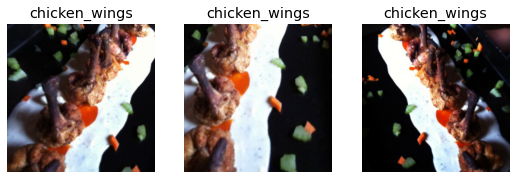

In [ ]:
food = food.new(batch_tfms= aug_transforms(max_zoom=1.5))
dls = food.dataloaders(path/'images')
dls.train.show_batch(unique=True, max_n=3)

In [ ]:
# initial big item resize 
food = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = parent_label,
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, 
                            max_rotate=30, max_zoom = 1.2))

dls = food.dataloaders(path/'images')

In [ ]:
#dls.show_batch()

In [ ]:
food.summary(path/'images')
# 101 000 items, divided to 80 800 and 20 200

Setting-up type transforms pipelines
Found 101000 items
2 datasets of sizes 80800,20200
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/food-101/images/chicken_wings/878664.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x512
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/food-101/images/chicken_wings/878664.jpg
    applying parent_label gives
      chicken_wings
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(20)

Final sample: (PILImage mode=RGB size=512x512, TensorCategory(20))


Found 101000 items
2 datasets of sizes 80800,20200
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na

In [ ]:
# early training check
# first table for training the new heads
#learn = cnn_learner(dls, resnet18, metrics = error_rate)
#learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.256897,1.720943,0.440000,07:19


epoch,train_loss,valid_loss,error_rate,time
0,1.434848,1.171074,0.303911,08:08
1,1.080284,0.937627,0.245545,08:09


In [ ]:
# early training check
# first table for training the new heads
# default lr_max =None
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fit_one_cycle(n_epoch = 2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.101020,1.635802,0.417772,07:01
1,1.804692,1.476184,0.375891,07:00


In [ ]:
#interp = ClassificationInterpretation.from_learner(learn)
#print(interp.most_confused(min_val = 10))
#print(interp.plot_top_losses(6, figsize = (15,11)))
#learn.show_results()

## run gets interrupted here

Minimal Loss at:  0.00036307806149125097
Steepest Loss at:  1.0964781722577754e-06


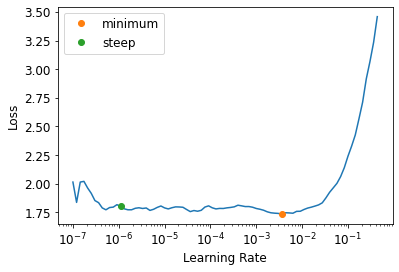

In [ ]:
# fine-tuning the model
# learn = cnn_learner(dls, resnet34, metrics = error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs = (minimum, steep))

print('Minimal Loss at: ', lr_min)
print('Steepest Loss at: ', lr_steep)

In [ ]:
# applying new lr 
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fit_one_cycle(n_epoch = 2, lr_max = 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.139148,1.631702,0.416535,06:56


epoch,train_loss,valid_loss,error_rate,time
0,2.139148,1.631702,0.416535,06:56
1,1.841607,1.480238,0.375941,06:54


SuggestedLRs(valley=6.30957365501672e-05)

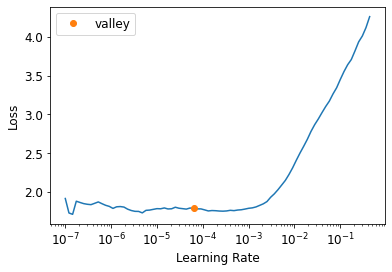

In [ ]:
# then unfreeze other layers
learn.unfreeze()

# rerunning with more layers
learn.lr_find()

In [ ]:
#learn.fit_one_cycle(2, lr_max = )

In [ ]:
# applying discriminative learning rates
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fit_one_cycle(2, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(2, lr_max = slice(1e-4, 1e-3 ))

epoch,train_loss,valid_loss,error_rate,time
0,2.073020,1.670179,0.428911,07:03
1,1.694385,1.395255,0.361881,07:00


epoch,train_loss,valid_loss,error_rate,time
0,1.584452,1.347486,0.356287,07:11
1,1.154608,0.981985,0.258366,07:09


In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fit_one_cycle(n_epoch = 4)

epoch,train_loss,valid_loss,error_rate,time
0,2.332079,1.747578,0.443911,07:00
1,1.859839,1.478496,0.379257,07:00
2,1.747916,1.371549,0.357277,07:00
3,1.572912,1.346137,0.350149,06:59


In [ ]:
#learn.recorder.plot_loss()

In [ ]:
# checking the alternate technique of fine_tune
# default base_lr = 0.002, lr_max = None, freeze_epochs =1
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(epochs = 4, freeze_epochs=1) 

epoch,train_loss,valid_loss,error_rate,time
0,2.324074,1.878536,0.475149,06:59


epoch,train_loss,valid_loss,error_rate,time
0,1.699931,1.347748,0.353218,07:09
1,1.376907,1.134114,0.301139,07:10


epoch,train_loss,valid_loss,error_rate,time
0,1.699931,1.347748,0.353218,07:09
1,1.376907,1.134114,0.301139,07:10
2,1.131816,0.992450,0.262228,07:09
3,0.964797,0.952234,0.252327,07:10


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet34, metrics = error_rate).to_fp16()
learn_34.fine_tune(4, freeze_epochs = 1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.247195,1.721853,0.440000,07:21


epoch,train_loss,valid_loss,error_rate,time
0,1.528078,1.250321,0.329851,08:03
1,1.252020,1.040503,0.273960,08:04
2,0.942080,0.876940,0.232772,08:03
3,0.750913,0.829747,0.220198,08:04


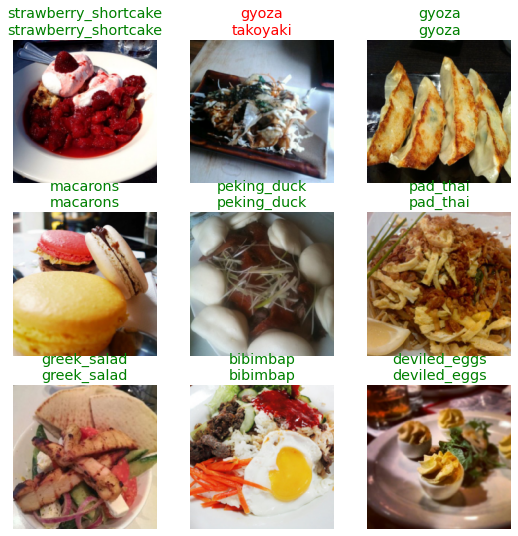

In [ ]:
learn.show_results()

In [ ]:
# checking for misclassifcations
#interp.most_confused(min_val = 10)

In [ ]:
#interp.plot_top_losses(6, figsize = (15,11))

In [ ]:
### options for cleaning

In [ ]:
# getting an image for prediction
!pip install bing-image-downloader
from bing_image_downloader import downloader
query_string = 'dessert'
sample1 = downloader.download(query_string, limit = 1, 
                            output_dir = 'dataset',
                            adult_filter_off=True,
                            force_replace=False,
                            timeout=60,
                            verbose=True)
sample1

[%] Downloading Images to /content/dataset/dessert


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://cdn1.veggiesdontbite.com/wp-content/uploads/2016/06/raw-vegan-layered-strawberry-chocolate-mousse-dessert-90.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.

Please show your support here
https://www.buymeacoffee.com/gurugaurav




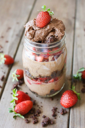

In [ ]:
samp_url = ['https://cdn1.veggiesdontbite.com/wp-content/uploads/2016/06/raw-vegan-layered-strawberry-chocolate-mousse-dessert-90.jpg']
dest = 'Desktop'
download_url(samp_url[0], dest)
Image.open(dest).to_thumb(128,128)

In [ ]:
pred, pred_idx, probs = learn.predict(dest)
voc = learn.dls.vocab
list(zip(pred, voc))

print('The item is a:', pred, 'with a probability of', float(probs[pred_idx]) )

The item is a: strawberry_shortcake with a probability of 0.7104625105857849


In [ ]:
# saving the model
learn.export()
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# create an app
# further details at https://medium.com/@yrodriguezmd/testing-the-waters-of-deep-learning-8d687b21bb92

btn_upload = widgets.FileUpload()
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
btn_run = widgets.Button(description = 'Classify')
lbl_pred = widgets.Label()

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)

from ipywidgets import *
VBox([widgets.Label("I will guess what you're eating if you show me a picture!"),
      btn_upload, btn_run, out_pl, lbl_pred])

IndexError: ignored